In [18]:
import numpy as np
import seaborn as sns
from numpy.random import binomial
from scipy.stats import skew, kurtosis, moment
from tqdm import tqdm

from src.tools.plotter import init_plots, PALETTE_GRADIENT, store_sns
from src.trace_set.database import Database
from src.trace_set.set_hw import TraceSetHW
from src.trace_set.transform import fixed_fixed

from numpy import logical_and as and_

from src.tvla.cri import tvla_cri
from src.tvla.tvla import Group

init_plots()

In [19]:
def get_mdiff(db: Database, max_moment=3):
    trace_set = TraceSetHW(db)
    x, y = fixed_fixed(*trace_set.all())
    m = binomial(1, .5, len(x))

    a1, a2 = x[and_(m, ~y)], x[and_(~m, ~y)]
    b = x[y]
    mdiff_inner = [moment(a1, m) - moment(a2, m) for m in tqdm(range(max_moment + 1))]
    mdiff_outer = [moment(a1, m) - moment(b, m) for m in tqdm(range(max_moment + 1))]

    return np.abs(mdiff_outer) - np.abs(mdiff_inner)

MDIFF_AISY = get_mdiff(Database.aisy_raw)
MDIFF_ASCAD = get_mdiff(Database.ascad)

100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


In [20]:
def plot_mdiff(name, mdiff):
    plot_lines = dict([(f"$\mu_{{{ix}}}$", mdiff[ix]) for ix in range(len(mdiff))])

    g = sns.lineplot(data=plot_lines, palette=PALETTE_GRADIENT, dashes=None)
    g.set(title=f"{name} traces, Moment difference", xlabel="Sample point index", ylabel="Moment difference: $\mu_i(A) - \mu_i(B)$")

    store_sns(g, f"mdiff_{name}")

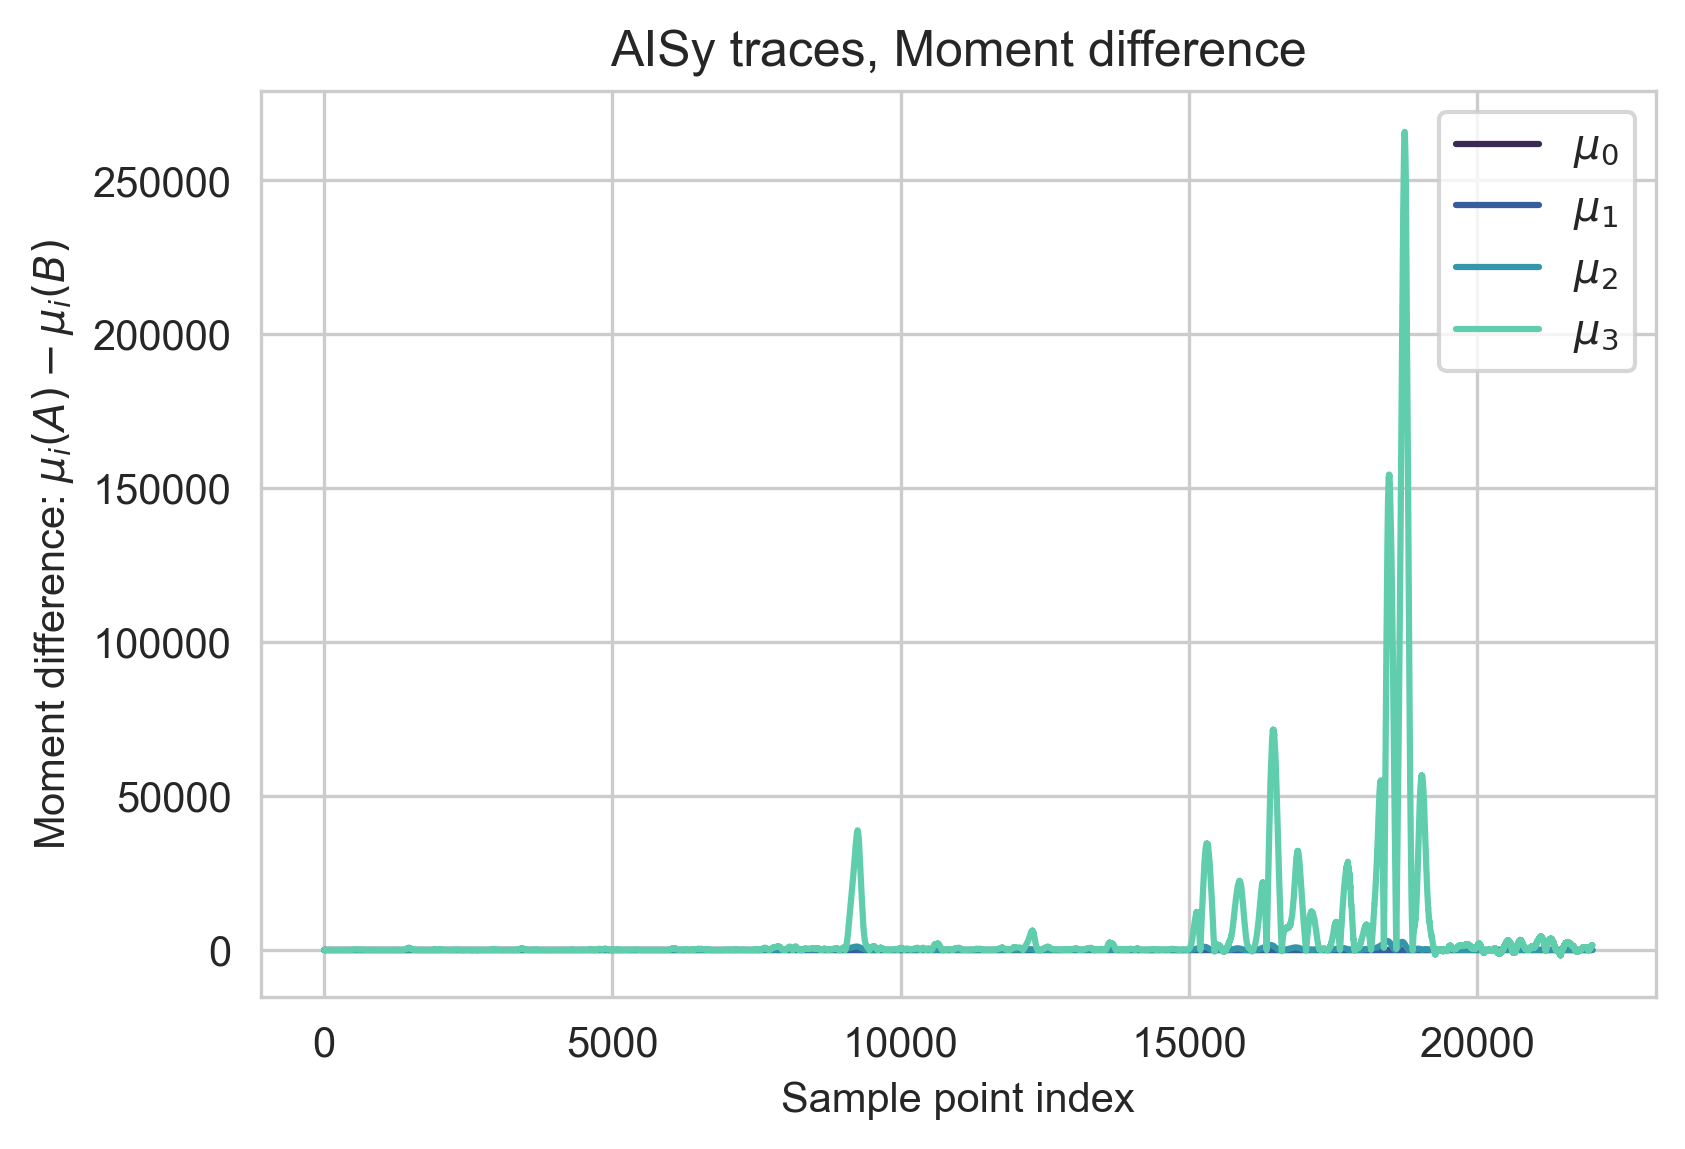

In [21]:
plot_mdiff("AISy", MDIFF_AISY)

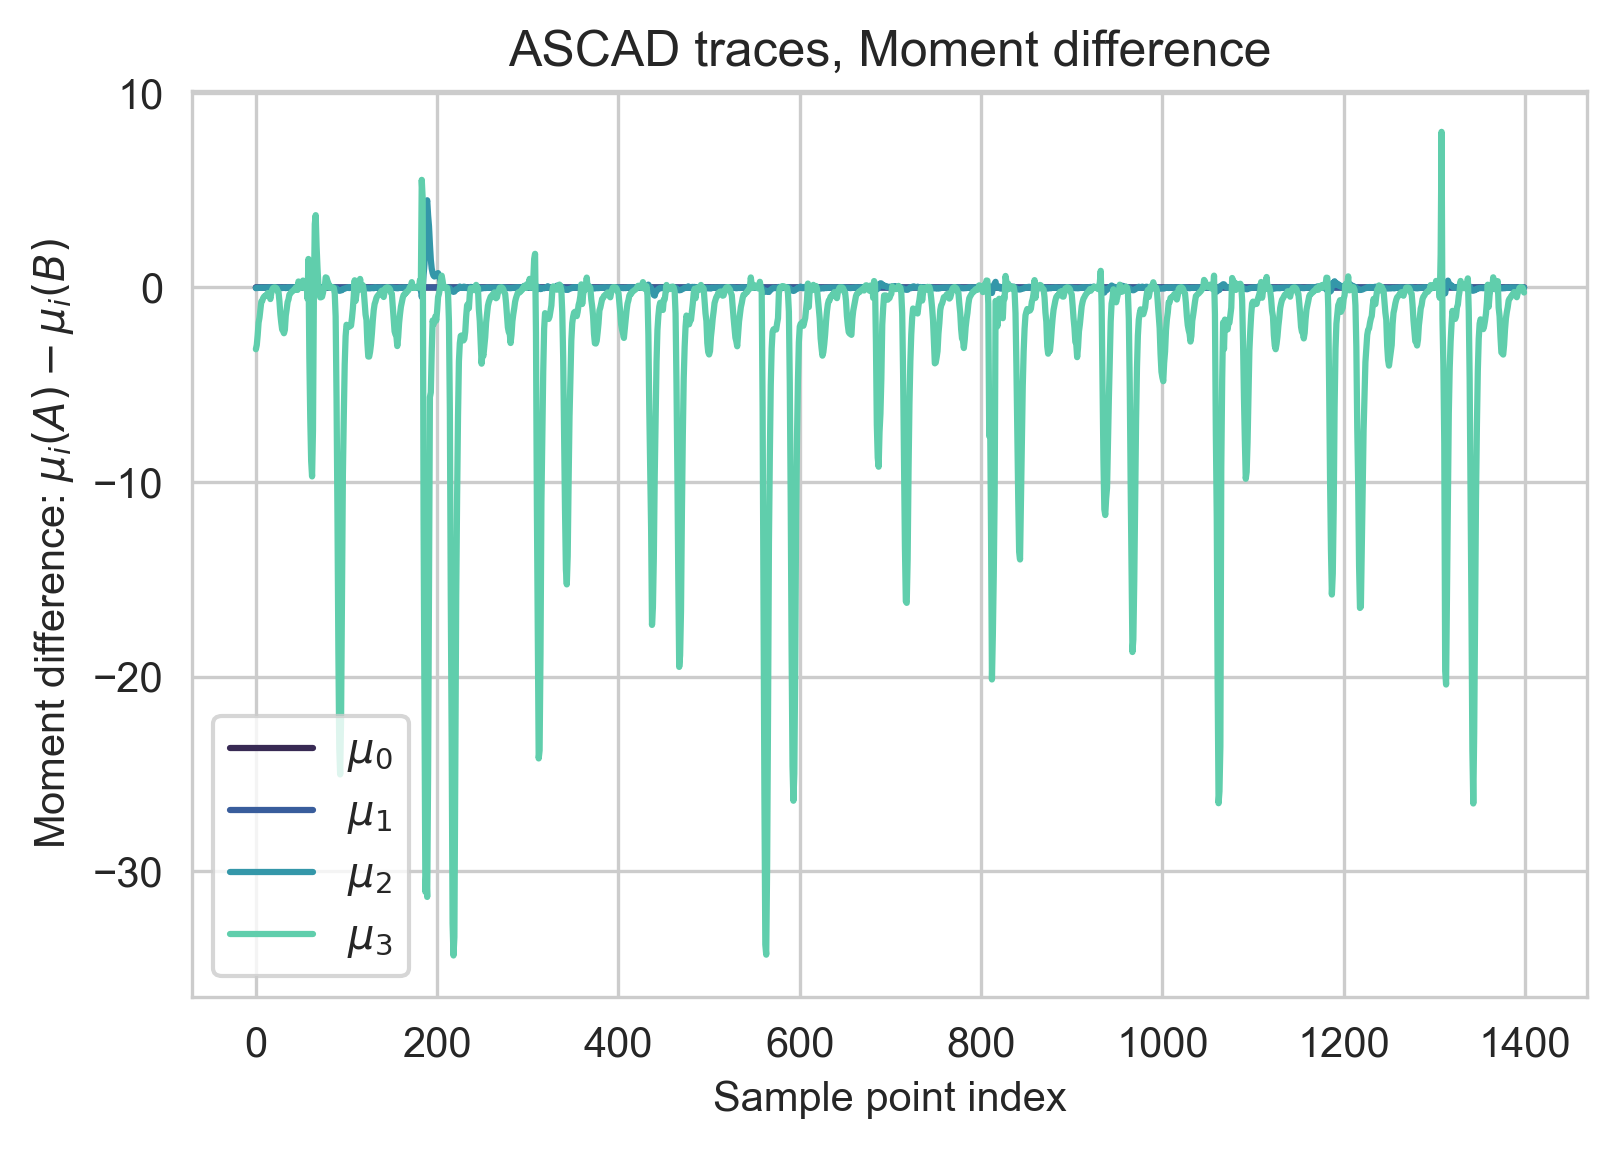

In [22]:
plot_mdiff("ASCAD", MDIFF_ASCAD)

In [23]:
PVS = tvla_cri(TraceSetHW(Database.ascad))

In [24]:
np.min(PVS[2])

2.743306991051549e-39